In [ ]:
# Несколько функций для отрисовки графиков
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
   
    import matplotlib.pyplot as plt
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
    import matplotlib.pyplot as plt
from sklearn import metrics

def plot_roc(test_label, preds_prob):

    # calculate the fpr and tpr for all thresholds of the classification
    fpr, tpr, threshold = metrics.roc_curve(test_label, preds_prob)
    roc_auc = metrics.auc(fpr, tpr)


    # plot auc
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.plot([0, 1], [0, 1],'r--')

    plt.xlim([0, 1])
    plt.ylim([0, 1])

    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

    plt.title('Receiver Operating Characteristic')

    plt.legend(loc = 'lower right')

    plt.show()


# <center>Майнор "Интеллектуальный анализ данных"</center>

# <center>Курс "Введение в анализ данных"</center>

# <center>Лабораторная работа №3. Supervised Learning by Sizov D.</center> 

## Данные

В рамках данной лабораторной работы предлагается проанализировать набор данных о студентах двух школ в Португалии. В наборе данных `students_data.csv` представлена информация о студентах, посещающих два курса - математику (`Math`) и поргутальский язык (`Por`). Некоторые студенты представлены в обоих курсах, некоторые только в одном. Для каждого студента известны три оценки по курсу: оценка за первое полугодие (`G1`), оценка за второе полугодие (`G2`) и итоговая оценка за год (`G3`).

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import os.path as path
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier
from matplotlib import style
style.use('seaborn')
%config InlineBackend.figure_format = 'svg'
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pd.set_option('display.max_columns', 40)
pd.set_option('display.max_colwidth', -1)

In [ ]:
dataframe = pd.read_csv("students_data.csv")
dataframe.head(10)

,ID,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,100097,Por,GP,F,16,U,GT3,A,3,4,services,other,course,father,1,1,0,no,no,no,no,yes,yes,yes,no,3,2,1,1,4,5,12,15,13,14
1,101021,Por,GP,F,17,U,GT3,T,3,2,other,other,course,mother,1,2,0,no,no,no,yes,no,yes,yes,no,5,3,4,1,3,3,2,17,18,17
2,102965,Por,GP,M,16,U,LE3,T,1,2,health,services,course,mother,2,1,2,no,no,no,no,no,yes,yes,no,4,4,5,3,5,5,0,9,8,10
3,102989,Por,MS,M,17,U,GT3,T,2,3,other,services,home,father,2,2,0,no,no,no,yes,yes,yes,yes,no,4,4,3,1,1,3,4,14,15,16
4,103131,Por,GP,F,16,U,GT3,T,1,1,at_home,other,home,mother,2,1,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,4,5,2,12,13,13
5,103144,Por,GP,M,18,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,yes,yes,yes,yes,yes,3,3,4,4,5,4,2,11,11,12
6,105257,Por,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,6,11,12,9
7,107639,Por,MS,F,15,R,GT3,T,4,4,teacher,other,course,mother,2,1,0,no,no,no,no,yes,yes,yes,yes,1,5,1,3,5,5,0,13,14,14
8,107914,Math,GP,F,15,U,LE3,T,3,2,services,other,reputation,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,4,4,1,1,5,10,7,6,6
9,108089,Por,MS,M,16,R,GT3,T,3,4,other,health,other,mother,3,2,0,no,no,no,no,no,yes,no,no,3,4,5,1,2,5,4,9,10,11


### Признаки

Данные представлены признаками различных типов: числовыми, категориальными, упорядоченными категориальными.

**Описание признаков:**

In [ ]:
criteria = pd.read_csv('students_data_features.csv',
            delimiter=';',
            encoding='windows-1251')
list_criteria = criteria["Признак"]
criteria

,Признак,Описание
0,ID,Уникальный номер наблюдения
1,Subject,"Предмет: 'Math' - математика, 'Por' - португальский язык"
2,school,"Школа: 'GP' - Gabriel Pereira, 'MS' - Mousinho da Silveira"
3,sex,"Пол студента: 'F' - женский, 'M' - мужской"
4,age,Возраст студента
5,address,"Место проживания студента: 'U' - в городе, 'R' - за городом"
6,famsize,"Число членов семьи: 'LE3' - если <= 3, 'GT3' - если > 3"
7,Pstatus,"Отношения родителей: 'T' - живут вместе, 'A' - живут раздельно"
8,Medu,"Образование матери: 0 - без образования, 1 - начальная школа, 2 – от 5 до 9 классов, 3 – среднее образование, 4 – высшее образование"
9,Fedu,"Образование отца: 0 - без образования, 1 - начальная школа, 2 – от 5 до 9 классов, 3 – среднее образование, 4 – высшее образование"


## Предобработка данных
### Оцифровка  
* Для того, чтобы данные было наиболее удобно обрабатывать и прогонять через различные модели, проведем их оцифровку.

* Данную задачу выполним при помощи библиотеки sklearn 

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

quality = ['Subject', 'school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

for i in range(len(quality)):
    le.fit(dataframe[quality[i]])
    dataframe[quality[i]+"_le"] = le.transform(dataframe[quality[i]])
    dataframe.drop(quality[i], axis=1, inplace=True)

dataframe.drop(["G2"], axis = 1, inplace = True)
ID = dataframe.ID
dataframe.drop(["ID"], axis = 1, inplace = True)

dataframe["g3"] = dataframe.G3
dataframe.drop(["G3"], axis = 1, inplace = True)
dataframe.head(20)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,Subject_le,school_le,sex_le,address_le,famsize_le,Pstatus_le,Mjob_le,Fjob_le,reason_le,guardian_le,schoolsup_le,famsup_le,paid_le,activities_le,nursery_le,higher_le,internet_le,romantic_le,g3
0,16,3,4,1,1,0,3,2,1,1,4,5,12,15,1,0,0,1,0,0,3,2,0,0,0,0,0,0,1,1,1,0,14
1,17,3,2,1,2,0,5,3,4,1,3,3,2,17,1,0,0,1,0,1,2,2,0,1,0,0,0,1,0,1,1,0,17
2,16,1,2,2,1,2,4,4,5,3,5,5,0,9,1,0,1,1,1,1,1,3,0,1,0,0,0,0,0,1,1,0,10
3,17,2,3,2,2,0,4,4,3,1,1,3,4,14,1,1,1,1,0,1,2,3,1,0,0,0,0,1,1,1,1,0,16
4,16,1,1,2,1,0,4,3,2,1,4,5,2,12,1,0,0,1,0,1,0,2,1,1,0,1,0,0,1,1,0,0,13
5,18,3,1,2,1,0,3,3,4,4,5,4,2,11,1,0,1,1,1,1,3,3,0,1,0,0,0,1,1,1,1,1,12
6,18,1,1,2,2,0,1,1,1,1,1,5,6,11,1,1,0,1,0,1,2,2,0,1,0,0,0,1,1,1,0,0,9
7,15,4,4,2,1,0,1,5,1,3,5,5,0,13,1,1,0,0,0,1,4,2,0,1,0,0,0,0,1,1,1,1,14
8,15,3,2,1,2,0,4,4,4,1,1,5,10,7,0,0,0,1,1,1,3,2,3,1,0,1,1,0,1,1,1,0,6
9,16,3,4,3,2,0,3,4,5,1,2,5,4,9,1,1,1,0,0,1,2,1,2,1,0,0,0,0,0,1,0,0,11


### Feature engeneering
* Воспользуемся методом отбора признаков на основе их важности.
* Ансамблевые алгоритмы на основе деревьев решений, такие как случайный лес (random forest), позволяют оценить важность признаков.
* Обучим классификатор ExtraTreesClassifier, чтобы с его помощью определить важность признаков. 

In [ ]:
dataframe.head(10)

,ID,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,Subject_le,school_le,sex_le,address_le,famsize_le,Pstatus_le,Mjob_le,Fjob_le,reason_le,guardian_le,schoolsup_le,famsup_le,paid_le,activities_le,nursery_le,higher_le,internet_le,romantic_le,g3
0,100097,16,3,4,1,1,0,3,2,1,1,4,5,12,15,1,0,0,1,0,0,3,2,0,0,0,0,0,0,1,1,1,0,14
1,101021,17,3,2,1,2,0,5,3,4,1,3,3,2,17,1,0,0,1,0,1,2,2,0,1,0,0,0,1,0,1,1,0,17
2,102965,16,1,2,2,1,2,4,4,5,3,5,5,0,9,1,0,1,1,1,1,1,3,0,1,0,0,0,0,0,1,1,0,10
3,102989,17,2,3,2,2,0,4,4,3,1,1,3,4,14,1,1,1,1,0,1,2,3,1,0,0,0,0,1,1,1,1,0,16
4,103131,16,1,1,2,1,0,4,3,2,1,4,5,2,12,1,0,0,1,0,1,0,2,1,1,0,1,0,0,1,1,0,0,13
5,103144,18,3,1,2,1,0,3,3,4,4,5,4,2,11,1,0,1,1,1,1,3,3,0,1,0,0,0,1,1,1,1,1,12
6,105257,18,1,1,2,2,0,1,1,1,1,1,5,6,11,1,1,0,1,0,1,2,2,0,1,0,0,0,1,1,1,0,0,9
7,107639,15,4,4,2,1,0,1,5,1,3,5,5,0,13,1,1,0,0,0,1,4,2,0,1,0,0,0,0,1,1,1,1,14
8,107914,15,3,2,1,2,0,4,4,4,1,1,5,10,7,0,0,0,1,1,1,3,2,3,1,0,1,1,0,1,1,1,0,6
9,108089,16,3,4,3,2,0,3,4,5,1,2,5,4,9,1,1,1,0,0,1,2,1,2,1,0,0,0,0,0,1,0,0,11


In [ ]:
X = dataframe.values[:,0:len(dataframe.columns) - 1]
Y = dataframe.values[:,len(dataframe.columns) - 1] 

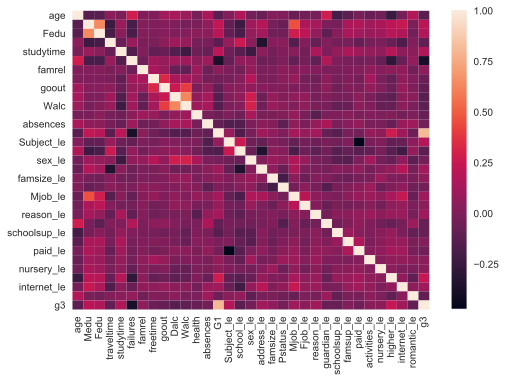

In [ ]:
sns.heatmap(dataframe.corr())

по графику можем заметить, что некоторые переменные следует убрать, из-за бесполезности

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X, Y)
cols = dataframe.columns[:len(dataframe.columns)-1]

df = pd.DataFrame()
df["features"] = cols
df["weights"] = model.feature_importances_
df = df.sort_values(by="weights",ascending = False)
df

,features,weights
13,G1,0.112118
12,absences,0.060905
8,goout,0.040076
10,Walc,0.038983
0,age,0.038620
7,freetime,0.038437
11,health,0.037029
1,Medu,0.036420
6,famrel,0.036215
22,reason_le,0.035943


оставим только те элементы, которые входят в 75% важности

In [ ]:
i = 0
flag = 0
while flag < 0.75:
    flag = flag+df["weights"][i]
    i = i + 1

print("На ", i, "элементе, сумма становится больше 75%")
df = df.iloc[i:]
print("Список ненужных признаков:\n")
df

На  22 элементе, сумма становится больше 75%
Список ненужных признаков:



,features,weights
25,famsup_le,0.022825
26,paid_le,0.021670
5,failures,0.020187
30,internet_le,0.018541
17,address_le,0.017599
28,nursery_le,0.017291
15,school_le,0.016328
19,Pstatus_le,0.015558
24,schoolsup_le,0.013694
29,higher_le,0.008604


исключаем эти признаки из dataframe

In [ ]:
dataframe.drop([x for x in df["features"]], axis=1, inplace=True)

In [ ]:
dataframe.head(5)

,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,absences,G1,Subject_le,sex_le,famsize_le,Mjob_le,Fjob_le,reason_le,guardian_le,activities_le,romantic_le,g3
0,16,3,4,1,1,3,2,1,1,4,5,12,15,1,0,0,3,2,0,0,0,0,14
1,17,3,2,1,2,5,3,4,1,3,3,2,17,1,0,0,2,2,0,1,1,0,17
2,16,1,2,2,1,4,4,5,3,5,5,0,9,1,1,1,1,3,0,1,0,0,10
3,17,2,3,2,2,4,4,3,1,1,3,4,14,1,1,0,2,3,1,0,1,0,16
4,16,1,1,2,1,4,3,2,1,4,5,2,12,1,0,0,0,2,1,1,0,0,13


## Регрессия

Одним из пунктов является проверка признака G1 на итоговый результат, но если взять данные выше, в которых G1 - самый полезный признак, уже сейчас можно сказать, что с ним будут более точные результаты, чем без него.

Разбиваем по признаку Subject на математиков и португальцев

In [ ]:
subj = dataframe["Subject_le"] == 1
data_por, data_math = dataframe[subj], dataframe[~subj]
noG1_math= data_math.copy().drop(['G1'],axis=1)
noG1_por = data_por.copy().drop(['G1'],axis=1)

### Линейная регрессия

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics


def linear_regression(dataset,name):
    (trainData, 
     testData, 
     trainLabels, 
     testLabels) = train_test_split(dataset.drop(['g3','Subject_le'], axis=1),
                                                dataset['g3'],
                                                test_size=0.33, 
                                                random_state=42)

    model = linear_model.LinearRegression()
    model.fit(trainData, trainLabels)
    prediction = model.predict(testData)

    plt.plot(prediction[1:100], 'r-', label='Predicted')
    plt.plot(testLabels[1:100].values, 'b-', label='Correct')
    plt.xlabel("Observations <Linear> ")
    plt.ylabel("Marks")
    plt.legend(loc='best')
    plt.show()
 
    MSE = metrics.mean_squared_error(y_pred=prediction, 
                                     y_true=testLabels) 

    RMSE = np.sqrt(MSE)

    MAE = metrics.mean_absolute_error(y_pred=prediction, 
                                      y_true=testLabels)

    MEDIAN = metrics.median_absolute_error(y_pred=prediction, 
                                          y_true=testLabels)

    R2 = metrics.r2_score(y_pred=prediction, 
                          y_true=testLabels) 
    print(name+" Metrics:")
    print("MSE:   {}\nRMSE:  {}\nR2:    {}\nMAE:   {}\nMedae: {}".format(MSE, RMSE, R2, MAE, MEDIAN))
    return prediction

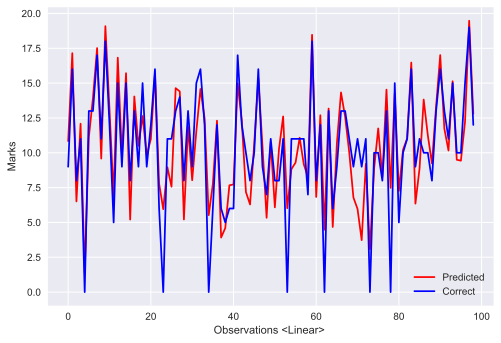

Math Metrics:
MSE:   5.765692777074846
RMSE:  2.401185702330173
R2:    0.6987368733219417
MAE:   1.8021383533904496
Medae: 1.4227345768045314


In [ ]:
math_lin = linear_regression(data_math.copy(), "Math")

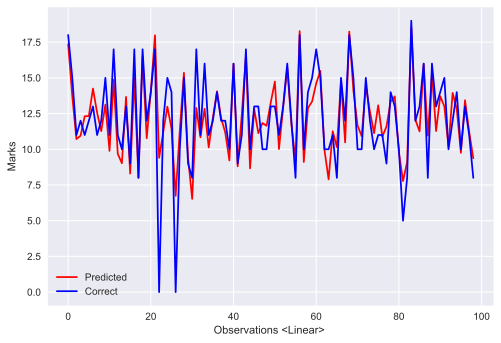

Portugal Metrics:
MSE:   2.429290793326467
RMSE:  1.558618232065334
R2:    0.7555925796238232
MAE:   1.075111178540484
Medae: 0.8284819203091836


In [ ]:
por_lin = linear_regression(data_por.copy(),"Portugal")

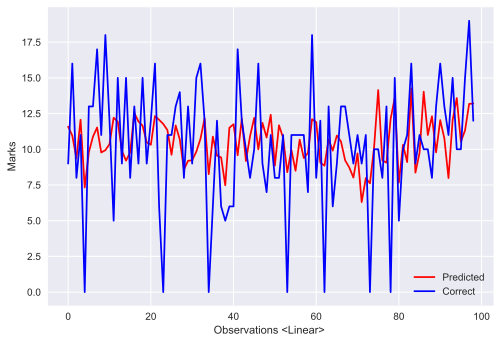

Math noG1 Metrics:
MSE:   18.172311528091893
RMSE:  4.262899427395853
R2:    0.05047882334476661
MAE:   3.3304031976307518
Medae: 2.7478817144422916


In [ ]:
noG1_math_lin = linear_regression(noG1_math.copy(),"Math noG1")

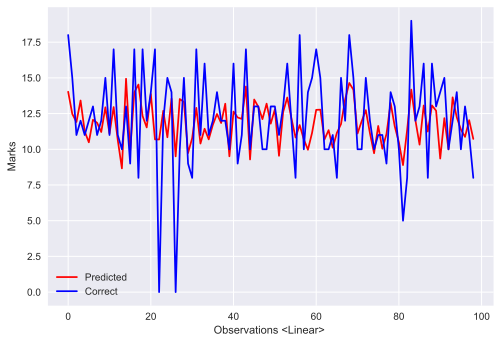

Portugal noG1 Metrics:
MSE:   7.835569985840886
RMSE:  2.799208814261788
R2:    0.21167467777950588
MAE:   2.051826515851251
Medae: 1.5115595148733636


In [ ]:
noG1_por_lin = linear_regression(noG1_por.copy(),"Portugal noG1")

И по графику и по параметрам R2 видно, что предсказывать значения, учитывая признак G1 более правильно, чем без него

### Гребневая регрессия

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
def ridge_regression(dataset,name):
    from sklearn.metrics import mean_squared_error
    (trainData, 
     testData, 
     trainLabels, 
     testLabels) = train_test_split(dataset.drop(['g3','Subject_le'], axis=1),
                                                dataset['g3'],
                                                test_size=0.33, 
                                                random_state=42)

    ridgeModel = linear_model.RidgeCV(alphas=np.array(range(0, 50, 1))/10, 
                                  cv=5,
                                 scoring='neg_mean_squared_error')
    
    ridgeModel.fit(trainData, trainLabels)
    
    prediction = ridgeModel.predict(testData)

    plt.plot(prediction[1:100], 'r-', label='Predicted')
    plt.plot(testLabels[1:100].values, 'b-', label='Correct')
    plt.xlabel("Observations  <Ridge> ")
    plt.ylabel("Marks")
    plt.legend(loc='best')
    plt.show()
    # Рассчитаем основные метрики 
    MSE = metrics.mean_squared_error(y_pred=prediction, 
                                     y_true=testLabels) #чем ниже значение MSE, тем выше качество модели 

    RMSE = np.sqrt(MSE)

    MAE = metrics.mean_absolute_error(y_pred=prediction, 
                                      y_true=testLabels)

    MEDIAN = metrics.median_absolute_error(y_pred=prediction, 
                                          y_true=testLabels)

    R2 = metrics.r2_score(y_pred=prediction, 
                          y_true=testLabels) # Чем лучше данная метрика к 1, тем лучше качество модели
    print(name+" Metrics:")
    print("MSE:   {}\nRMSE:  {}\nR2:    {}\nMAE:   {}\nMedae: {}".format(MSE, RMSE, R2, MAE, MEDIAN))
    return prediction

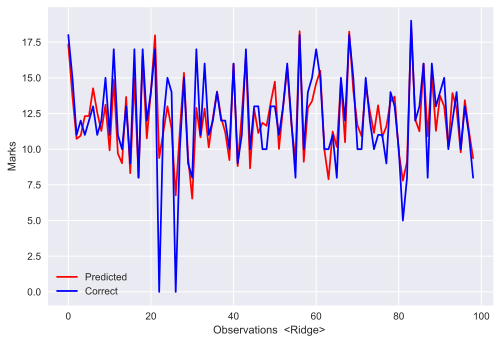

Portugal Metrics:
MSE:   2.424545466323388
RMSE:  1.5570952014322657
R2:    0.7560700000853217
MAE:   1.0736820352742213
Medae: 0.8281987887915943


In [ ]:
portugal_ridge = ridge_regression(data_por.copy(), "Portugal")

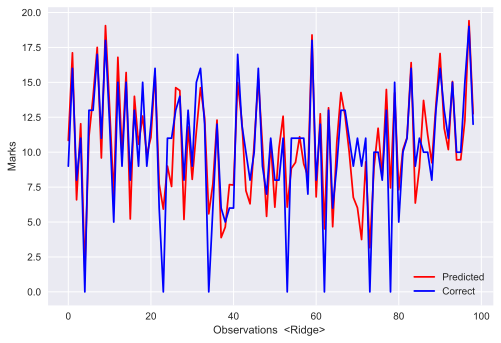

Math  Metrics:
MSE:   5.743318459259905
RMSE:  2.396522159142265
R2:    0.6999059534659651
MAE:   1.7964122113051102
Medae: 1.4115653847718228


In [ ]:
math_ridge = ridge_regression(data_math.copy(),"Math ")

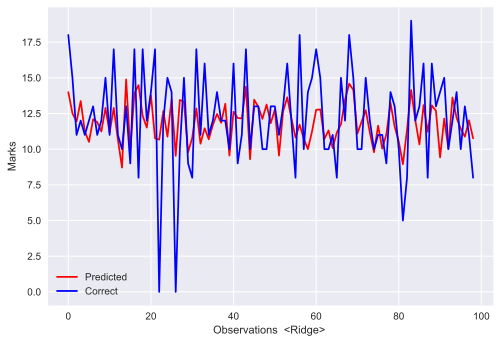

Portugal noG1 Metrics:
MSE:   7.818410228970612
RMSE:  2.7961420258940017
R2:    0.21340109600924895
MAE:   2.0509171977637686
Medae: 1.4876794196164465


In [ ]:
noG1_por_ridge = ridge_regression(noG1_por.copy(),"Portugal noG1")

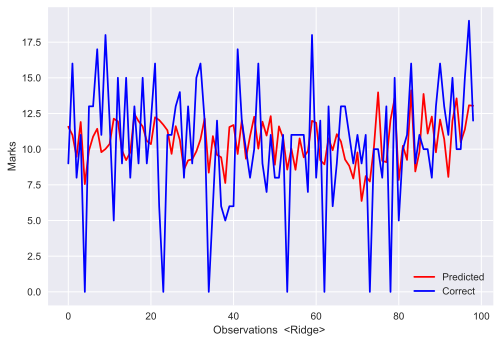

Math noG1 Metrics:
MSE:   18.100933364113203
RMSE:  4.254519169555262
R2:    0.05420840271851679
MAE:   3.320772903893925
Medae: 2.8398061598136835


In [ ]:
noG1_math_ridge = ridge_regression(noG1_math.copy(),"Math noG1")

### Лассо-регрессия

In [ ]:
def lasso_regression(dataset,name):
    (trainData, 
     testData, 
     trainLabels, 
     testLabels) = train_test_split(dataset.drop(['g3','Subject_le'], axis=1),
                                                dataset['g3'],
                                                test_size=0.33, 
                                                random_state=42)

    lassoModel = linear_model.LassoCV(alphas=np.array(range(1, 10000, 1))/10, 
                                  cv=5)

    lassoModel.fit(trainData, trainLabels)
    
    print(lassoModel.alpha_) 
    prediction = lassoModel.predict(testData)

    plt.plot(prediction[1:100], 'r-', label='Predicted')
    plt.plot(testLabels[1:100].values, 'b-', label='Correct')
    plt.xlabel("Test observations <Lasso> " + name)
    plt.ylabel("Marks")
    plt.legend(loc='best')
    plt.show()
     
    MSE = metrics.mean_squared_error(y_pred=prediction, 
                                     y_true=testLabels) 

    RMSE = np.sqrt(MSE)

    MAE = metrics.mean_absolute_error(y_pred=prediction, 
                                      y_true=testLabels)
    MEDIAN = metrics.median_absolute_error(y_pred=prediction, 
                                          y_true=testLabels)

    R2 = metrics.r2_score(y_pred=prediction, 
                          y_true=testLabels) 
    print(name+" Metrics:")
    print("MSE:   {}\nRMSE:  {}\nR2:    {}\nMAE:   {}\nMedae: {}".format(MSE, RMSE, R2, MAE, MEDIAN))
    return prediction

0.3


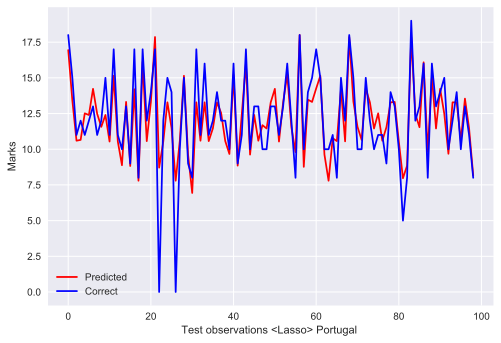

Portugal  Metrics:
MSE:   2.467805376807549
RMSE:  1.5709250067420624
R2:    0.7517176832872737
MAE:   1.1073960014514483
Medae: 0.7431398921953356


In [ ]:
portugal_lasso = lasso_regression(data_por.copy(),"Portugal ")

0.4


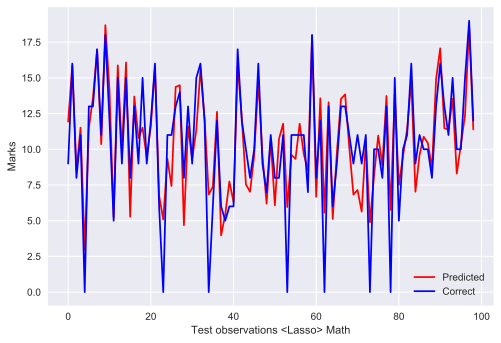

Math Metrics:
MSE:   5.460907200908636
RMSE:  2.3368584041205054
R2:    0.7146622198834679
MAE:   1.6735969514593185
Medae: 1.1455759199720283


In [ ]:
math_lasso  = lasso_regression(data_math.copy(),"Math")

0.1


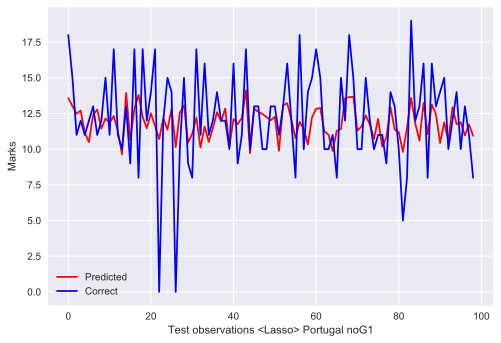

Portugal noG1 Metrics:
MSE:   7.863319880845903
RMSE:  2.8041611724089437
R2:    0.2088828011245918
MAE:   2.085646115575692
Medae: 1.571945556153775


In [ ]:
noG1_por_lasso  = lasso_regression(noG1_por.copy(), "Portugal noG1")

0.1


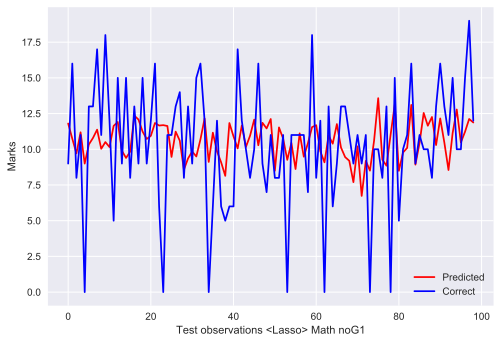

Math noG1 Metrics:
MSE:   17.94673504121473
RMSE:  4.236358700725746
R2:    0.06226541697179344
MAE:   3.2734212181610274
Medae: 2.6647706406141403


In [ ]:
noG1_math_lasso = lasso_regression(noG1_math.copy(), "Math noG1")

### KNN

In [ ]:
from sklearn import preprocessing

In [ ]:
def KNN(dataset,name):
    from sklearn.neighbors import KNeighborsRegressor
    from sklearn.model_selection import KFold
    (trainData, 
     testData, 
     trainLabels, 
     testLabels) = train_test_split(dataset.drop(['g3','Subject_le'], axis=1),
                                                dataset['g3'],
                                                test_size=0.33, 
                                                random_state=42)

    kf = KFold(n_splits=5, shuffle=True)
    kf.get_n_splits(trainData)
    
    knrModel = KNeighborsRegressor(n_neighbors=5)
    knrModel.fit(trainData, trainLabels)
    prediction = knrModel.predict(testData)

    plt.plot(prediction[1:100], 'r-', label='Predicted')
    plt.plot(testLabels[1:100].values, 'b-', label='Correct')
    plt.xlabel("Test observations <KNN> " + name)
    plt.ylabel("Marks")
    plt.legend(loc='best')
    plt.show()

    MSE = metrics.mean_squared_error(y_pred=prediction, 
                                     y_true=testLabels) 

    RMSE = np.sqrt(MSE)

    MAE = metrics.mean_absolute_error(y_pred=prediction, 
                                      y_true=testLabels)

    MEDIAN = metrics.median_absolute_error(y_pred=prediction, 
                                          y_true=testLabels)

    R2 = metrics.r2_score(y_pred=prediction, 
                          y_true=testLabels) 
    print(name+" Metrics:")
    print("MSE:   {}\nRMSE:  {}\nR2:    {}\nMAE:   {}\nMedae: {}".format(MSE, RMSE, R2, MAE, MEDIAN))
    return prediction

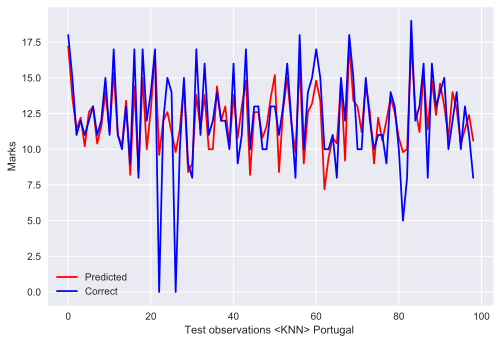

Portugal  Metrics:
MSE:   3.386046511627907
RMSE:  1.8401213306811883
R2:    0.659334775624981
MAE:   1.332093023255814
Medae: 1.0


In [ ]:
portugal_knn = KNN(data_por.copy(),"Portugal ")

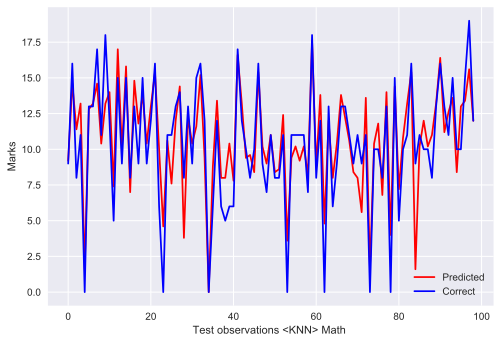

Math  Metrics:
MSE:   5.957862595419848
RMSE:  2.440873326377231
R2:    0.6886958110305266
MAE:   1.8076335877862597
Medae: 1.4000000000000004


In [ ]:
math_knn = KNN(data_math.copy(),"Math ")

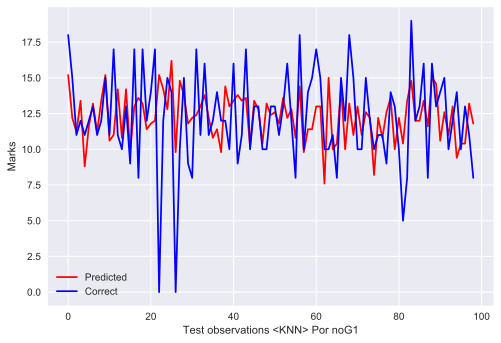

Por noG1 Metrics:
MSE:   9.987720930232557
RMSE:  3.160335572408816
R2:    -0.004850104689479107
MAE:   2.353488372093023
Medae: 2.1999999999999993


In [ ]:
noG1_por_KNN = KNN(noG1_por.copy(), "Por noG1")

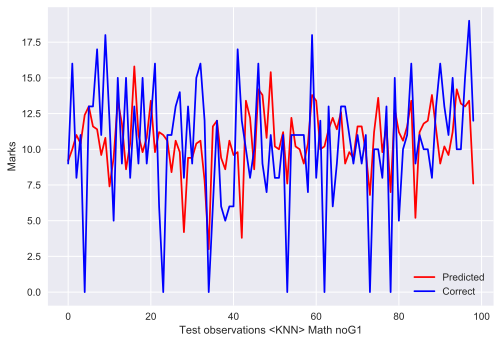

Math noG1 Metrics:
MSE:   17.03083969465649
RMSE:  4.126843793343345
R2:    0.11012185096549088
MAE:   3.3282442748091605
Medae: 2.8000000000000007


In [ ]:
noG1_math_KNN = KNN(noG1_math.copy(), "Math noG1")

### Radius NN

In [ ]:
def RNN(dataset,name,radius):
    from sklearn.neighbors import RadiusNeighborsRegressor
    (trainData, 
     testData, 
     trainLabels, 
     testLabels) = train_test_split(dataset.drop(['g3','Subject_le'], axis=1),
                                                dataset['g3'],
                                                test_size=0.33, 
                                                random_state=42)

    rnrModel = RadiusNeighborsRegressor(radius)
    rnrModel.fit(trainData, trainLabels)
    prediction = rnrModel.predict(testData)
    print(len(prediction))

    MSE = metrics.mean_squared_error(y_pred=prediction, 
                                     y_true=testLabels) 

    RMSE = np.sqrt(MSE)

    MAE = metrics.mean_absolute_error(y_pred=prediction, 
                                      y_true=testLabels)

    MEDIAN = metrics.median_absolute_error(y_pred=prediction, 
                                          y_true=testLabels)

    R2 = metrics.r2_score(y_pred=prediction, 
                          y_true=testLabels)
    print(name+" Metrics:")
    print("MSE:   {}\nRMSE:  {}\nR2:    {}\nMAE:   {}\nMedae: {}".format(MSE, RMSE, R2, MAE, MEDIAN))
    return MSE,RMSE,R2,MAE,MEDIAN,

In [ ]:
math_RNN = RNN(data_math.copy(), "Math G1",25)

131
Math G1 Metrics:
MSE:   19.099786322024695
RMSE:  4.370330230317235
R2:    0.002017351820256752
MAE:   3.2814412772500883
Medae: 2.4847328244274802


In [ ]:
por_RNN = RNN(data_por.copy(), "Por G1",8)

215
Por G1 Metrics:
MSE:   4.665624601226495
RMSE:  2.1600056947208484
R2:    0.5305982814564794
MAE:   1.588855326160267
Medae: 1.32258064516129


In [ ]:
noG1_math_RNN = RNN(noG1_math.copy(), "Math noG1",25)

131
Math noG1 Metrics:
MSE:   19.27992395960727
RMSE:  4.3908910211490415
R2:    -0.007395017174897767
MAE:   3.2964180943816683
Medae: 2.4847328244274802


In [ ]:
noG1_por_RNN = RNN(noG1_por.copy(), "Por noG1",50)

215
Por noG1 Metrics:
MSE:   9.961271950640722
RMSE:  3.156148277670224
R2:    -0.002189111245886055
MAE:   2.390697674418605
Medae: 1.8571428571428577


## Итог регрессия
*  Во всех метотах, не исключая параметр G1 получались более точные данные, причем намного, это видно как по данным, так и на графиках. Это подтверждает показатели выше, то что G1 основной признак в определении оценки.
*  Все методы показывают примерно равные результаты 69-75%, кроме метода RNN, где параметр получилось подобрать только у учеников, изучающий португальский, используя G1 с показателем 53%. Осталоные имеют совсем маленькие показатели

# Классификация
## Бинарная классификация
### KNN Classifier

In [ ]:
from sklearn import svm, datasets

import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyClassifier

In [ ]:
dataset_math_bin = noG1_math
dataset_port_bin = noG1_por
dataset_math_bin['binary_classification'] = list(map(lambda x: 1 if x >= 8 else 0, dataset_math_bin['g3']))
dataset_port_bin['binary_classification'] = list(map(lambda x: 1 if x >= 8 else 0, dataset_port_bin['g3']))
dataset_port_bin.drop(['g3','Subject_le'], axis=1, inplace=True)
dataset_math_bin.drop(['g3','Subject_le'], axis=1, inplace=True)

In [ ]:
def knn_classifaer(dataset):
    (trainData, 
     testData, 
     trainLabels, 
     testLabels) = train_test_split(dataset.drop(['binary_classification'], axis=1),
                                                dataset['binary_classification'],
                                                test_size=0.33, 
                                                random_state=1337)

    kf = KFold(n_splits=5, shuffle=True)
    for train_index, test_index in kf.split(dataset):
        print('Train:', train_index[:10])
        print('Test:', test_index[:10])

    knn = KNeighborsClassifier(n_neighbors=5)
    dm = DummyClassifier(strategy='most_frequent')

    kf = KFold(n_splits=5, shuffle=True)

    scores_knn = []
    scores_dummy = []

    Data = dataset.drop(['binary_classification'], axis=1)
    label = dataset['binary_classification']

    for i in range(10):
        scores_knn.extend(cross_val_score(knn, Data, label, cv=kf, scoring='f1_micro'))
        scores_dummy.extend(cross_val_score(dm, Data, label, cv=kf, scoring='f1_micro'))

    scores_dtree = np.array(scores_knn)
    scores_dummy = np.array(scores_dummy)

    del Data, label

    print('Mean score for KNN:', np.round(np.mean(scores_knn), 5),
      '\nMean score for Dummy:', np.round(np.mean(scores_dummy), 5))

    style.use('seaborn')
    pd.Series(scores_dummy).plot()
    plt.ylabel('f1_micro')
    plt.xlabel('iteration')
    plt.show()

    style.use('seaborn')
    pd.Series(scores_knn).plot()
    plt.ylabel('f1_micro')
    plt.xlabel('iteration')
    plt.show()

    knn = KNeighborsClassifier()
    params = {'n_neighbors': np.arange(1, 20, 2),
             'weights': ['uniform', 'distance']}

    rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10)

    clf = GridSearchCV(knn, params, cv=rskf, scoring='f1_micro')

    clf.fit(dataset.drop(['binary_classification'], axis=1),
            dataset['binary_classification'])
    
    knn_model_math = KNeighborsClassifier(n_neighbors=clf.best_params_.get("n_neighbors"))
    
    print(clf.best_params_.get("n_neighbors"))
    knn_model_math.fit(trainData, trainLabels)

    prediction = knn_model_math.predict(testData)
    print("Accuracy:", round(metrics.accuracy_score(testLabels, prediction), 5),
           '\nBalanced accuracy:', round(metrics.balanced_accuracy_score(testLabels, prediction), 5))
    print(metrics.classification_report(testLabels, prediction))
   
    style.use('classic')
    
    plot_confusion_matrix(metrics.confusion_matrix(testLabels, prediction),
                      target_names=['0', '1'],
                      normalize=False)
    return prediction

Train: [0 1 2 3 4 5 6 7 8 9]
Test: [13 16 18 19 24 26 36 41 63 69]
Train: [ 0  1  2  3  6  9 10 11 12 13]
Test: [ 4  5  7  8 21 30 34 38 44 47]
Train: [ 0  1  2  4  5  6  7  8 10 12]
Test: [ 3  9 11 14 22 23 25 27 28 29]
Train: [ 0  1  3  4  5  7  8  9 10 11]
Test: [ 2  6 15 35 39 45 50 54 55 61]
Train: [ 2  3  4  5  6  7  8  9 11 13]
Test: [ 0  1 10 12 17 20 31 32 33 40]
Mean score for KNN: 0.81519 
Mean score for Dummy: 0.82278


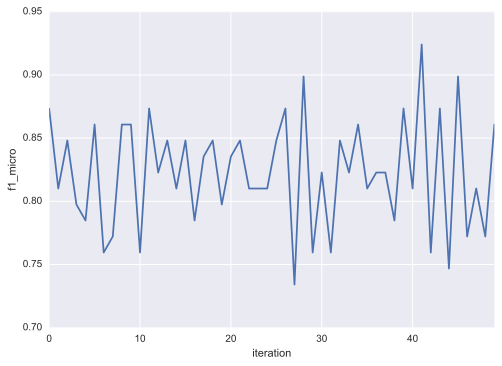

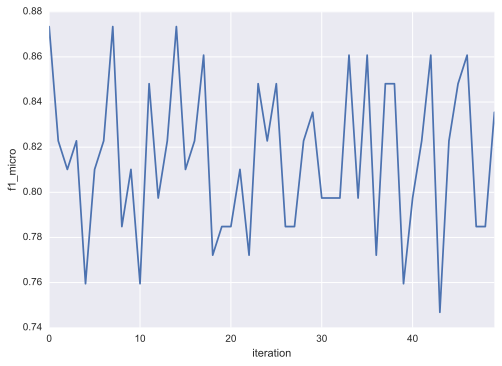

13
Accuracy: 0.83206 
Balanced accuracy: 0.52174
              precision    recall  f1-score   support

           0       1.00      0.04      0.08        23
           1       0.83      1.00      0.91       108

   micro avg       0.83      0.83      0.83       131
   macro avg       0.92      0.52      0.50       131
weighted avg       0.86      0.83      0.76       131



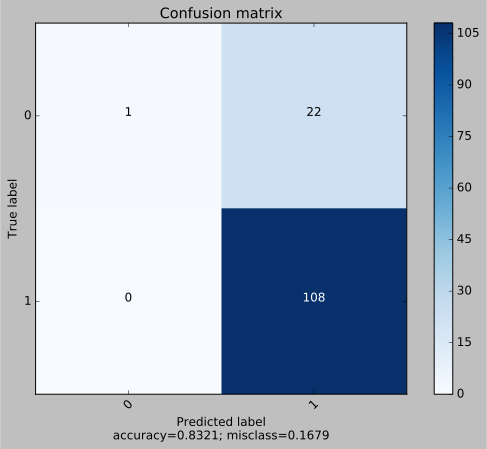

In [ ]:
math_KNN = knn_classifaer(dataset_math_bin)

Train: [ 0  1  2  3  4  6  8  9 11 13]
Test: [ 5  7 10 12 16 32 48 52 56 66]
Train: [ 0  1  3  4  5  7  8  9 10 11]
Test: [ 2  6 18 23 27 29 34 43 50 54]
Train: [ 0  1  2  3  5  6  7  9 10 12]
Test: [ 4  8 11 13 20 22 24 36 37 39]
Train: [ 1  2  4  5  6  7  8  9 10 11]
Test: [ 0  3 25 26 30 31 38 42 51 53]
Train: [ 0  2  3  4  5  6  7  8 10 11]
Test: [ 1  9 14 15 17 19 21 28 33 35]
Mean score for KNN: 0.95362 
Mean score for Dummy: 0.95377


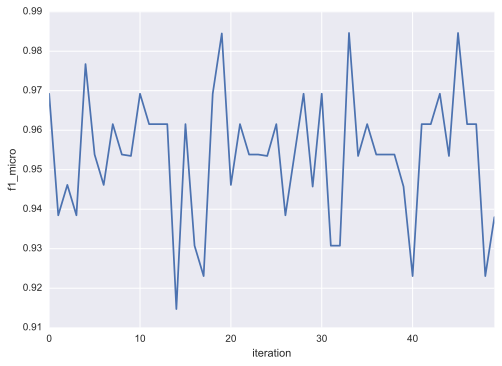

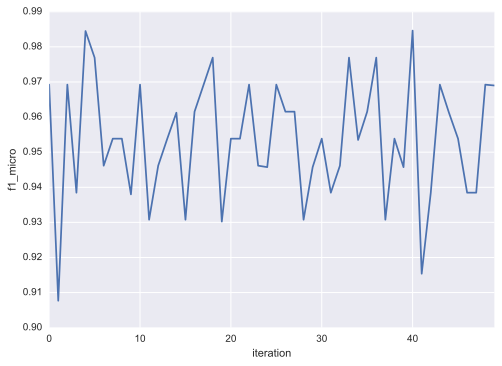

5
Accuracy: 0.94884 
Balanced accuracy: 0.5
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.95      1.00      0.97       204

   micro avg       0.95      0.95      0.95       215
   macro avg       0.47      0.50      0.49       215
weighted avg       0.90      0.95      0.92       215



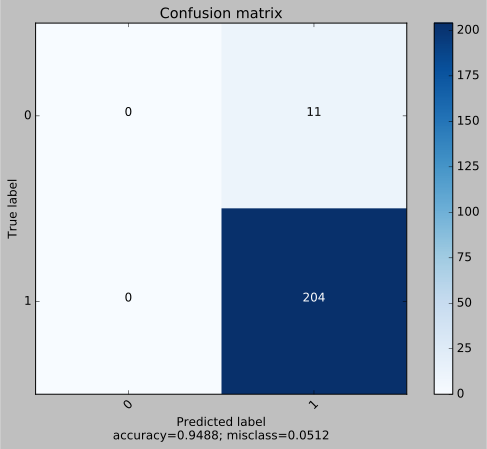

In [ ]:
port_KNN = knn_classifaer(dataset_port_bin)

 ### Логистическая регрессия

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [ ]:
def log_regression(dataset):
    (trainData, 
     testData, 
     trainLabels, 
     testLabels) = train_test_split(dataset.drop(['binary_classification'], axis=1),
                                                dataset['binary_classification'],
                                                test_size=0.33, 
                                                random_state=42)
    lgr = LogisticRegression()
    lgr.fit(trainData, trainLabels)
    prediction = lgr.predict(testData)
    prediction

 
    style.use('classic')
    metr = metrics.confusion_matrix(testLabels, prediction)
    plot_confusion_matrix(metr, ['0', '1'], False)
    
    preds_prob = lgr.predict_proba(testData)[:,1]
    
    plot_roc(testLabels, preds_prob)
    
    sns.distplot(preds_prob[testLabels == 0], hist=False, rug=False, label='class 0')
    sns.distplot(preds_prob[testLabels == 1], hist=False, rug=False, label='class 1')
    plt.legend()
    plt.show()
    print("Accuracy:", round(metrics.accuracy_score(testLabels, prediction), 5),
      '\nBalanced accuracy:', round(metrics.balanced_accuracy_score(testLabels, prediction), 5))

    print()
    print(metrics.classification_report(testLabels, prediction))
    

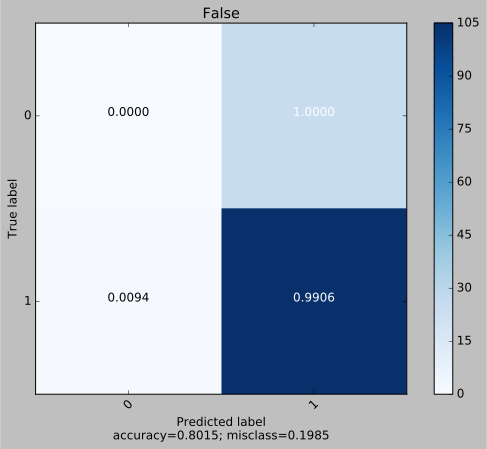

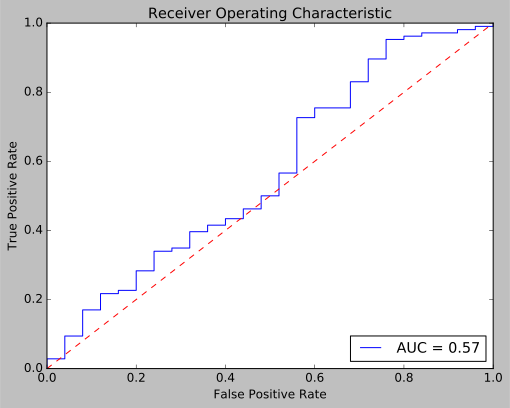

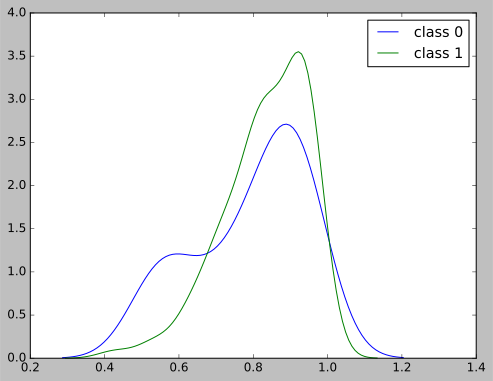

Accuracy: 0.80153 
Balanced accuracy: 0.49528

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.81      0.99      0.89       106

   micro avg       0.80      0.80      0.80       131
   macro avg       0.40      0.50      0.44       131
weighted avg       0.65      0.80      0.72       131



In [ ]:
math_log = log_regression(dataset_math_bin)

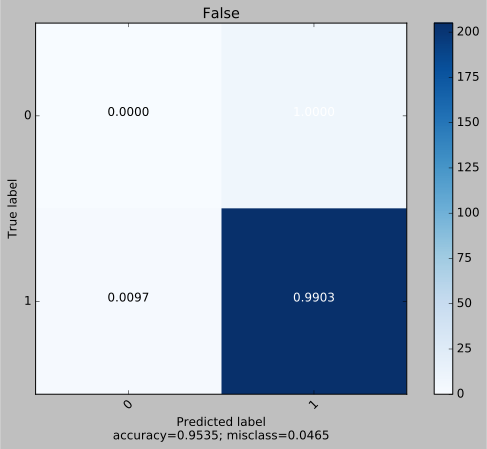

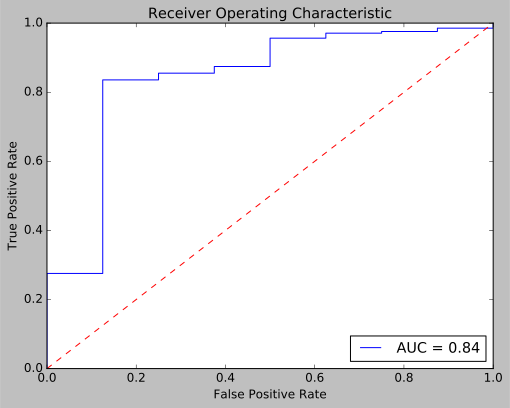

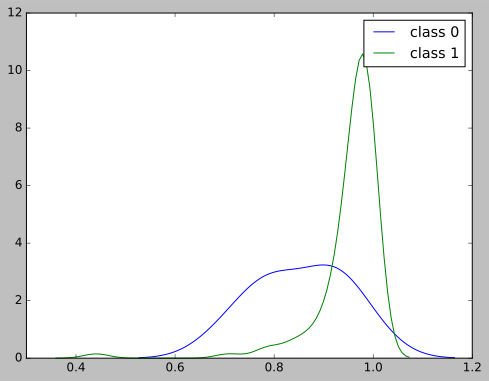

Accuracy: 0.95349 
Balanced accuracy: 0.49517

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.96      0.99      0.98       207

   micro avg       0.95      0.95      0.95       215
   macro avg       0.48      0.50      0.49       215
weighted avg       0.93      0.95      0.94       215



In [ ]:
port_log = log_regression(dataset_port_bin)

### Дерево решений.

In [ ]:
def decision_tree(dataset):
    (trainData, 
     testData, 
     trainLabels, 
     testLabels) = train_test_split(dataset.drop(['binary_classification'], axis=1),
                                                dataset['binary_classification'],
                                                test_size=0.33, 
                                                random_state=42)
    
    decision_tree = DecisionTreeClassifier()
    
    decision_tree.fit(trainData, trainLabels)

    prediction = decision_tree.predict(testData)
    print("Accuracy:",
      round(metrics.accuracy_score(testLabels, prediction), 5),
     '\nBalanced accuracy:',
     round(metrics.balanced_accuracy_score(testLabels, prediction), 5))
    print(metrics.classification_report(testLabels, prediction))
    style.use('classic')
    plot_confusion_matrix(cm=metrics.confusion_matrix(testLabels, prediction),
                      target_names=['0', '1'],
                      normalize=True)

Accuracy: 0.69466 
Balanced accuracy: 0.56679
              precision    recall  f1-score   support

           0       0.27      0.36      0.31        25
           1       0.84      0.77      0.80       106

   micro avg       0.69      0.69      0.69       131
   macro avg       0.55      0.57      0.56       131
weighted avg       0.73      0.69      0.71       131



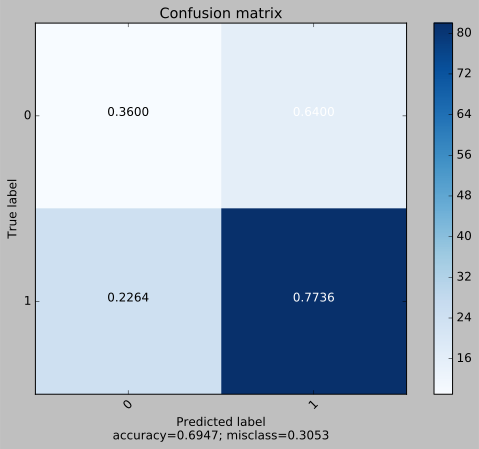

In [ ]:
decision_tree(dataset_math_bin)

Accuracy: 0.90698 
Balanced accuracy: 0.59118
              precision    recall  f1-score   support

           0       0.12      0.25      0.17         8
           1       0.97      0.93      0.95       207

   micro avg       0.91      0.91      0.91       215
   macro avg       0.55      0.59      0.56       215
weighted avg       0.94      0.91      0.92       215



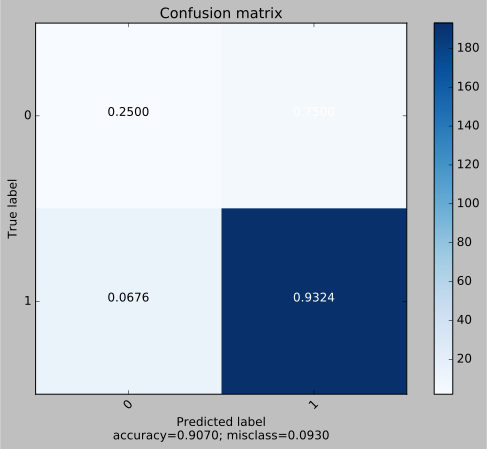

In [ ]:
decision_tree(dataset_port_bin)

Все три метода показали хорошие похожие результаты, но метод Decision Trees в обоих примерах имеет меньше accuracy чем KNN и Логистическая регрессия. Были использованы различные подходы для оценки качества моделей: confusion matrix и производные метрики, roc-кривая и roc auc

## Многоклассовая классификация

In [ ]:
def set_mark(g3):
    if g3 >= 18:
        return 5
    elif g3 >= 14:
        return 4
    elif g3 >= 8:
        return 3
    else:
        return 2
data_math_ml =  data_math.copy() 
data_por_ml = data_por.copy()
data_math_ml["final"] = data_math.g3.apply(set_mark)
data_por_ml["final"] = data_por.g3.apply(set_mark)
data_math_ml.drop(["g3","G1"], axis=1)
data_por_ml.drop(["g3","G1"], axis=1);


### KNN

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyClassifier

In [ ]:
def knn_classifaer_ml(dataset):
    (trainData, 
     testData, 
     trainLabels, 
     testLabels) = train_test_split(dataset.drop(['final'], axis=1),
                                                dataset['final'],
                                                test_size=0.33, 
                                                random_state=1337)

    kf = KFold(n_splits=5, shuffle=True)
    for train_index, test_index in kf.split(dataset):
        print('Train:', train_index[:10])
        print('Test:', test_index[:10])
        print('\n')

    knn = KNeighborsClassifier(n_neighbors=5)
    dm = DummyClassifier(strategy='most_frequent')

    kf = KFold(n_splits=5, shuffle=True)

    scores_knn = []
    scores_dummy = []

    Data = dataset.drop(['final'], axis=1)
    label = dataset['final']

    for i in range(10):
        scores_knn.extend(cross_val_score(knn, Data, label, cv=kf, scoring='f1_micro'))
        scores_dummy.extend(cross_val_score(dm, Data, label, cv=kf, scoring='f1_micro'))

    scores_dtree = np.array(scores_knn)
    scores_dummy = np.array(scores_dummy)

    del Data, label

    print('Mean score for KNN:', np.round(np.mean(scores_knn), 5),
      '\nMean score for Dummy:', np.round(np.mean(scores_dummy), 5))

    style.use('seaborn')
    pd.Series(scores_dummy).plot()
    plt.ylabel('f1_micro')
    plt.xlabel('iteration')
    plt.show()

    style.use('seaborn')
    pd.Series(scores_knn).plot()
    plt.ylabel('f1_micro')
    plt.xlabel('iteration')
    plt.show()

    knn = KNeighborsClassifier()
    params = {'n_neighbors': np.arange(1, 20, 2),
             'weights': ['uniform', 'distance']}

    rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10)

    clf = GridSearchCV(knn, params, cv=rskf, scoring='f1_micro')


    clf.fit(dataset.drop(['final'], axis=1),
            dataset['final'])
    

    knn_model_math = KNeighborsClassifier(n_neighbors=clf.best_params_.get("n_neighbors"))
    
    print(clf.best_params_.get("n_neighbors"))
    knn_model_math.fit(trainData, trainLabels)

    prediction = knn_model_math.predict(testData)
    print("Accuracy:", round(metrics.accuracy_score(testLabels, prediction), 5),
           '\nBalanced accuracy:', round(metrics.balanced_accuracy_score(testLabels, prediction), 5))
    print(metrics.classification_report(testLabels, prediction))
   
    style.use('classic')
    
    plot_confusion_matrix(metrics.confusion_matrix(testLabels, prediction),
                      target_names=['2','3','4','5'],
                      normalize=False)

    return prediction

Train: [ 0  2  3  4  5  6  8  9 11 12]
Test: [ 1  7 10 34 43 44 47 52 53 61]


Train: [ 0  1  2  3  4  5  7  8  9 10]
Test: [ 6 15 18 21 32 35 38 42 45 58]


Train: [ 0  1  2  4  6  7  8  9 10 11]
Test: [ 3  5 16 17 19 20 23 26 30 33]


Train: [ 1  3  4  5  6  7  8  9 10 13]
Test: [ 0  2 11 12 24 25 28 29 36 41]


Train: [ 0  1  2  3  5  6  7 10 11 12]
Test: [ 4  8  9 13 14 22 27 31 39 40]


Mean score for KNN: 0.88177 
Mean score for Dummy: 0.56962


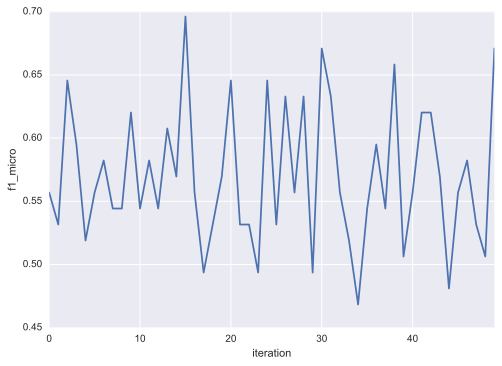

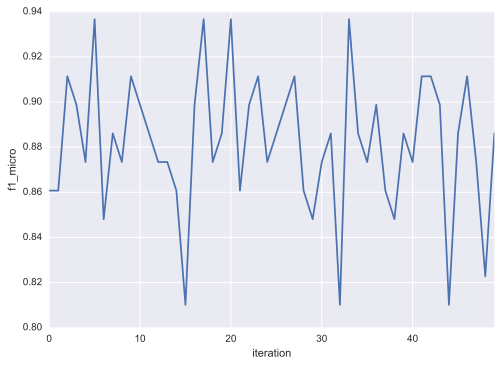

7
Accuracy: 0.9313 
Balanced accuracy: 0.71364
              precision    recall  f1-score   support

           2       0.95      0.91      0.93        23
           3       0.96      0.97      0.97        71
           4       0.86      0.97      0.91        33
           5       0.00      0.00      0.00         4

   micro avg       0.93      0.93      0.93       131
   macro avg       0.69      0.71      0.70       131
weighted avg       0.90      0.93      0.92       131



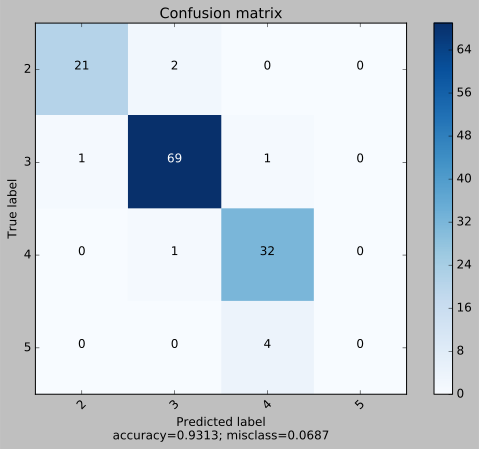

In [ ]:
knn_classifaer_ml(data_math_ml.copy());

Train: [ 0  1  2  4  5  7  8  9 10 11]
Test: [ 3  6 13 18 20 26 28 45 46 47]


Train: [ 0  1  2  3  4  6  8  9 10 13]
Test: [ 5  7 11 12 14 24 27 29 30 31]


Train: [ 0  1  2  3  5  6  7  8  9 10]
Test: [ 4 16 17 32 34 39 40 43 48 49]


Train: [ 0  2  3  4  5  6  7 11 12 13]
Test: [ 1  8  9 10 15 19 21 38 41 42]


Train: [ 1  3  4  5  6  7  8  9 10 11]
Test: [ 0  2 22 23 25 33 37 51 52 56]


Mean score for KNN: 0.89508 
Mean score for Dummy: 0.65489


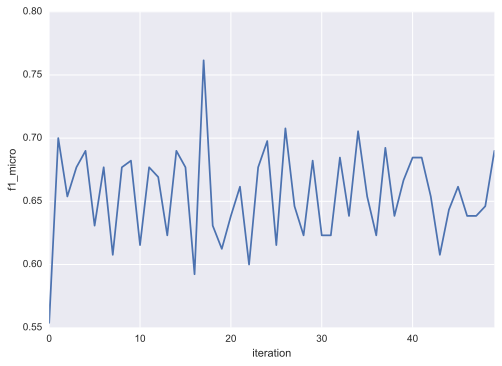

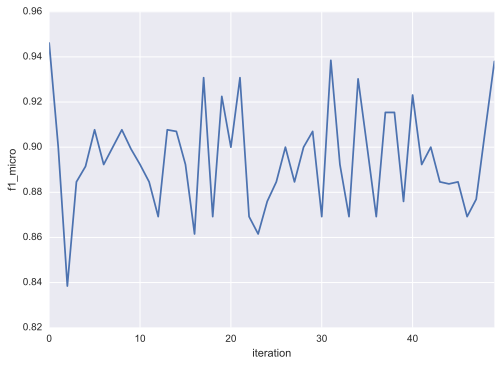

5
Accuracy: 0.90698 
Balanced accuracy: 0.7627
              precision    recall  f1-score   support

           2       1.00      0.55      0.71        11
           3       0.94      0.95      0.94       152
           4       0.80      0.89      0.85        46
           5       1.00      0.67      0.80         6

   micro avg       0.91      0.91      0.91       215
   macro avg       0.93      0.76      0.82       215
weighted avg       0.91      0.91      0.90       215



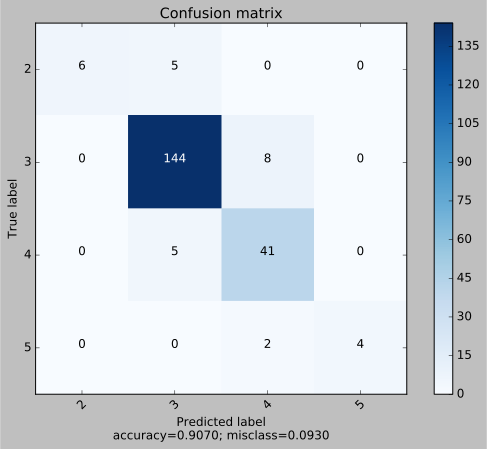

In [ ]:
knn_classifaer_ml(data_por_ml.copy());

### Логистическая регрессия

In [ ]:
def log_regression_ml(dataset):
    (trainData, 
     testData, 
     trainLabels, 
     testLabels) = train_test_split(dataset.drop(['final'], axis=1),
                                                dataset['final'],
                                                test_size=0.33, 
                                                random_state=42)
    lgr = LogisticRegression()
    lgr.fit(trainData, trainLabels)
    prediction = lgr.predict(testData)

    style.use('classic')
    metr = metrics.confusion_matrix(testLabels, prediction)
    plot_confusion_matrix(metr, ['2','3','4','5'], False)
    
    preds_prob = lgr.predict_proba(testData)[:,1]
        
    sns.distplot(preds_prob[testLabels == 2], hist=False, rug=False, label='mark 2')
    sns.distplot(preds_prob[testLabels == 3], hist=False, rug=False, label='mark 3')
    sns.distplot(preds_prob[testLabels == 4], hist=False, rug=False, label='mark 4')
    sns.distplot(preds_prob[testLabels == 5], hist=False, rug=False, label='mark 5')

    plt.legend()
    plt.show()
    print("Accuracy:", round(metrics.accuracy_score(testLabels, prediction), 5),
      '\nBalanced accuracy:', round(metrics.balanced_accuracy_score(testLabels, prediction), 5))

    print(metrics.classification_report(testLabels, prediction)) 

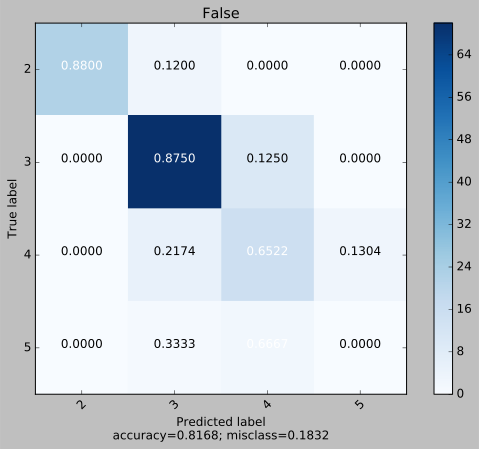

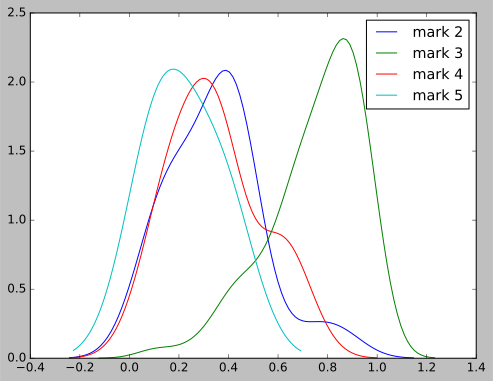

Accuracy: 0.81679 
Balanced accuracy: 0.60179
              precision    recall  f1-score   support

           2       1.00      0.88      0.94        25
           3       0.89      0.88      0.88        80
           4       0.56      0.65      0.60        23
           5       0.00      0.00      0.00         3

   micro avg       0.82      0.82      0.82       131
   macro avg       0.61      0.60      0.60       131
weighted avg       0.83      0.82      0.82       131



In [ ]:
log_regression_ml(data_math_ml);

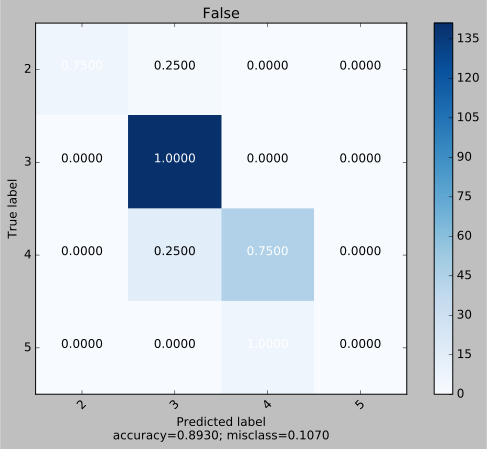

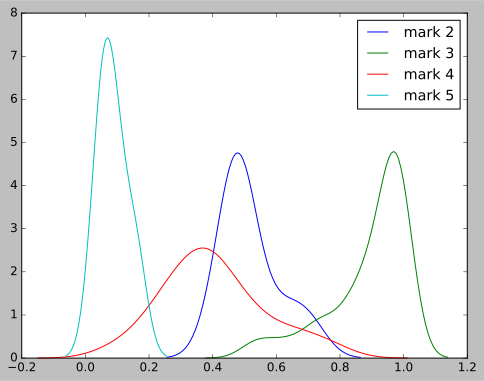

Accuracy: 0.89302 
Balanced accuracy: 0.625
              precision    recall  f1-score   support

           2       1.00      0.75      0.86         8
           3       0.89      1.00      0.94       141
           4       0.88      0.75      0.81        60
           5       0.00      0.00      0.00         6

   micro avg       0.89      0.89      0.89       215
   macro avg       0.69      0.62      0.65       215
weighted avg       0.87      0.89      0.88       215



In [ ]:
log_regression_ml(data_por_ml)

### Дерево решений

In [ ]:
def decision_tree_ml(dataset):
    (trainData, 
     testData, 
     trainLabels, 
     testLabels) = train_test_split(dataset.drop(['final'], axis=1),
                                                dataset['final'],
                                                test_size=0.33, 
                                                random_state=42)
    
    decision_tree = DecisionTreeClassifier()
    
    decision_tree.fit(trainData, trainLabels)

    prediction = decision_tree.predict(testData)
    print("Accuracy:",
      round(metrics.accuracy_score(testLabels, prediction), 5),
     '\nBalanced accuracy:',
     round(metrics.balanced_accuracy_score(testLabels, prediction), 5))
    print(metrics.classification_report(testLabels, prediction))
    style.use('classic')
    plot_confusion_matrix(cm=metrics.confusion_matrix(testLabels, prediction),
                      target_names=['2', '3','4','5'],
                      normalize=True)

Accuracy: 1.0 
Balanced accuracy: 1.0
              precision    recall  f1-score   support

           2       1.00      1.00      1.00        25
           3       1.00      1.00      1.00        80
           4       1.00      1.00      1.00        23
           5       1.00      1.00      1.00         3

   micro avg       1.00      1.00      1.00       131
   macro avg       1.00      1.00      1.00       131
weighted avg       1.00      1.00      1.00       131



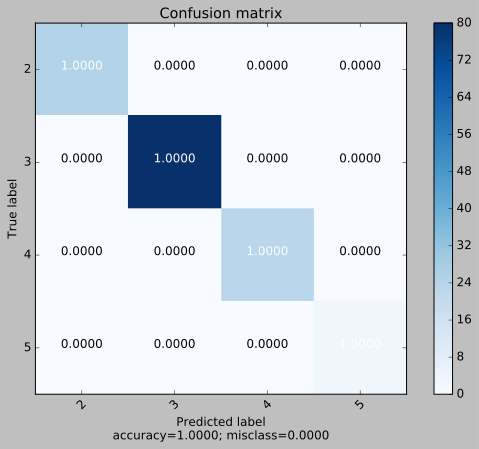

In [ ]:
decision_tree_ml(data_math_ml)

Accuracy: 1.0 
Balanced accuracy: 1.0
              precision    recall  f1-score   support

           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00       141
           4       1.00      1.00      1.00        60
           5       1.00      1.00      1.00         6

   micro avg       1.00      1.00      1.00       215
   macro avg       1.00      1.00      1.00       215
weighted avg       1.00      1.00      1.00       215



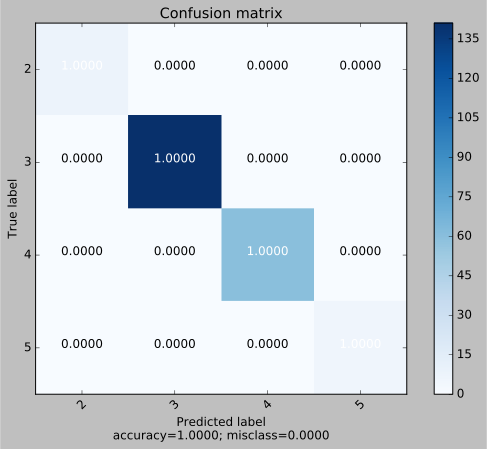

In [ ]:
decision_tree_ml(data_por_ml)

KNN дает более точные результаты, чем логистическая регрессия, но оба в принципе неплохи, в отличии от дерева который не дает никакого результата и не имеет смысла

# P.S. надеюсь, когда вы до сюда дойдете, оценки за остальные лабы и контрольные будут уже известны..... Спасибо за год!)